#### Simple single-label multiclass news topic classification

In [38]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

import matplotlib.pyplot as plt
import numpy as np

In [23]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) #10k most freq occuring words

In [24]:
max([max(sequence) for sequence in train_data]) #longest seq

9999

In [25]:
# Set spesific indices of an all-zero matrix to 1s
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

In [32]:
# Embed each label as an all-zero matrix with a 1 in place of the label index
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1
    return results

In [33]:
# Vectorize data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [35]:
X_val = X_train[:3000]
X_train = X_train[3000:]
y_val = y_train[:3000]
y_train = y_train[3000:]

**Network architecture**

- *```Intermediate layers```*: Here we define two 64-dimensional intermediate layers (hidden units) as less might be too limited to learn to separate 46 different classes. E.g. 16-dimensional layers can act as information bottlenecks, permanently dropping relevant information.


- *```Last layer```*: Last layer uses softmax acivation, meaning that the network will output a probability distribution over the 46 different output classes. For every input sample, the network will produce a 46-dimensional output vector, where **output[i]** is the probability that the sample belongs to class **i**. The 46-dimensional vector will sum up to 1.


- *```Loss function```*: *categorical_crossentropy* measures the distance between two probability distributions - distance between the probability distribution of the network output and the true distribution of the labels. If we would encode labels as integer tensors as ```y_train = np.array(train_labels)```, then we would use *sparse_categorical_crossentropy* loss as *categorical_crossentropy* expects the labels to follow categorical encoding.

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val,y_val))

Train on 5982 samples, validate on 3000 samples
Epoch 1/20
5982/5982 [==============================] - 3s 546us/step - loss: 2.9412 - accuracy: 0.4453 - val_loss: 2.0937 - val_accuracy: 0.5930
Epoch 2/20
5982/5982 [==============================] - 3s 476us/step - loss: 1.6761 - accuracy: 0.6638 - val_loss: 1.5450 - val_accuracy: 0.6623
Epoch 3/20
5982/5982 [==============================] - 3s 467us/step - loss: 1.2031 - accuracy: 0.7424 - val_loss: 1.3131 - val_accuracy: 0.7083
Epoch 4/20
5982/5982 [==============================] - 3s 440us/step - loss: 0.9458 - accuracy: 0.7979 - val_loss: 1.1988 - val_accuracy: 0.7413
Epoch 5/20
5982/5982 [==============================] - 3s 495us/step - loss: 0.7581 - accuracy: 0.8444 - val_loss: 1.1286 - val_accuracy: 0.7543
Epoch 6/20
5982/5982 [==============================] - 5s 774us/step - loss: 0.6188 - accuracy: 0.8748 - val_loss: 1.0782 - val_accuracy: 0.7703
Epoch 7/20
5982/5982 [==============================] - 3s 533us/step - loss

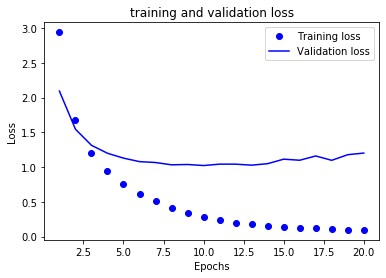

In [39]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

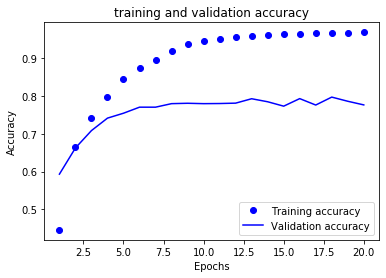

In [41]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

It seems that the network begins to overfit after nine epochs. Better to train a new network with nine epochs and then evaluate it on the test set.

In [42]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [43]:
X_test = X_train[8000:]
y_test = y_train[8000:]
X_val = X_train[:2000]
X_train = X_train[2000:8000]
y_val = y_train[:2000]
y_train = y_train[2000:8000]

In [47]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs=9, batch_size=512, validation_data=(X_val,y_val))
results = model.evaluate(X_test, y_test)
results

Train on 6000 samples, validate on 2000 samples
Epoch 1/9
6000/6000 [==============================] - 3s 426us/step - loss: 0.1002 - accuracy: 0.9650 - val_loss: 1.2302 - val_accuracy: 0.7825
Epoch 2/9
6000/6000 [==============================] - 3s 465us/step - loss: 0.0905 - accuracy: 0.9675 - val_loss: 1.2201 - val_accuracy: 0.7840
Epoch 3/9
6000/6000 [==============================] - 3s 465us/step - loss: 0.0891 - accuracy: 0.9673 - val_loss: 1.3042 - val_accuracy: 0.7790
Epoch 4/9
6000/6000 [==============================] - 2s 414us/step - loss: 0.0847 - accuracy: 0.9662 - val_loss: 1.4005 - val_accuracy: 0.7585
Epoch 5/9
6000/6000 [==============================] - 2s 415us/step - loss: 0.0839 - accuracy: 0.9668 - val_loss: 1.2871 - val_accuracy: 0.7835
Epoch 6/9
6000/6000 [==============================] - 3s 470us/step - loss: 0.0799 - accuracy: 0.9678 - val_loss: 1.2916 - val_accuracy: 0.7860
Epoch 7/9
6000/6000 [==============================] - 3s 446us/step - loss: 0.080

[1.4151643750138292, 0.7739307284355164]

This approach gives an accuracy of $\approx$ ```0.77%```